In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [8]:
import pandas as pd
df= pd.read_csv("advertising.csv")

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [12]:
print("\nStatistical Summary:\n",df.describe())


Statistical Summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


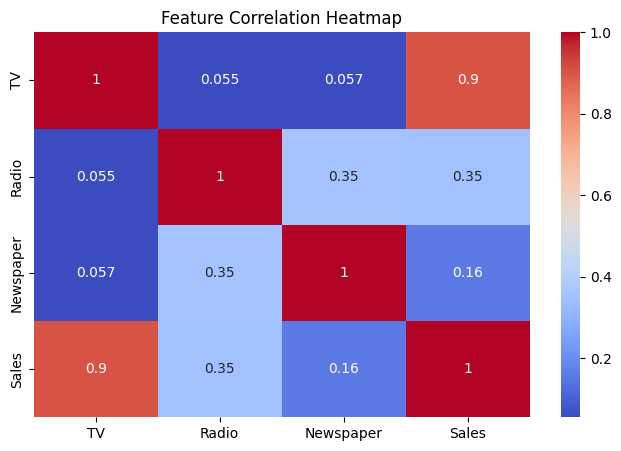

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

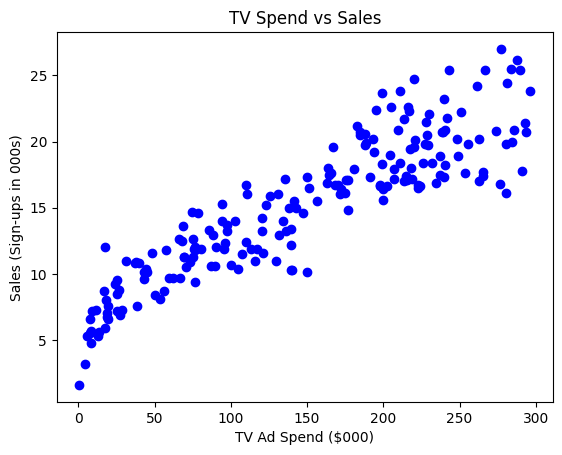

In [18]:
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel("TV Ad Spend ($000)")
plt.ylabel("Sales (Sign-ups in 000s)")
plt.title("TV Spend vs Sales")
plt.show()

In [19]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print(f"\n{name} Performance:")
    print("Train R2 Score:", round(r2_score(y_train, y_pred_train), 3))
    print("Test R2 Score :", round(r2_score(y_test, y_pred_test), 3))
    print("MAE (Test)    :", round(mean_absolute_error(y_test, y_pred_test), 2))
    print("RMSE (Test)   :", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

In [25]:
evaluate_model(lr, X_train, y_train, X_test, y_test, "Linear Regression")
evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")


Linear Regression Performance:
Train R2 Score: 0.9
Test R2 Score : 0.906
MAE (Test)    : 1.27
RMSE (Test)   : 1.71

Random Forest Performance:
Train R2 Score: 0.991
Test R2 Score : 0.953
MAE (Test)    : 0.92
RMSE (Test)   : 1.2


In [26]:
def forecast_signups(tv_spend, radio_spend, newspaper_spend, model=rf):
    """
    Predict new credit card sign-ups based on marketing spend.
    Default model = Random Forest (more accurate).
    """
    spend_data = np.array([[tv_spend, radio_spend, newspaper_spend]])
    prediction = model.predict(spend_data)[0]
    return round(prediction, 2)

In [28]:
print("\n--- Example Automation ---")
predicted_signups = forecast_signups(tv_spend=200, radio_spend=50, newspaper_spend=30)
print(f"If Company spends 200k on TV, 50k on Radio, 30k on Newspaper → Predicted sign-ups = {predicted_signups}k customers")


--- Example Automation ---
If Company spends 200k on TV, 50k on Radio, 30k on Newspaper → Predicted sign-ups = 22.93k customers


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
